***

<h1> INTRODUCTION </h1>

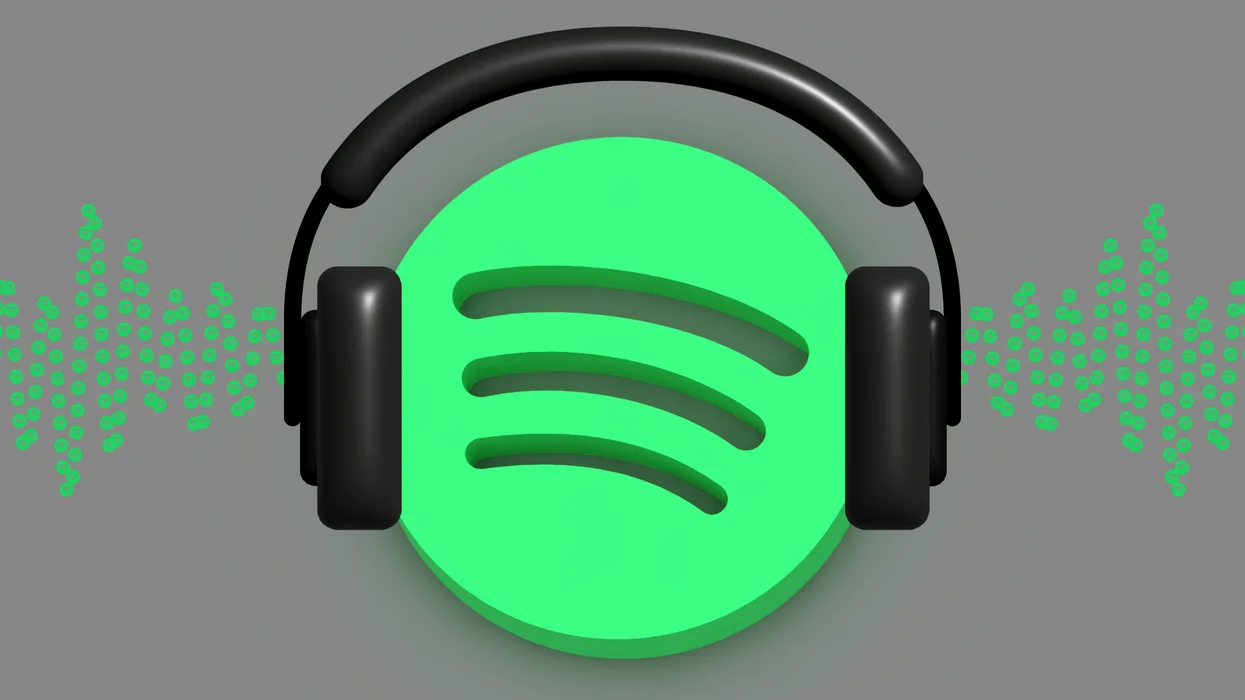

<div class="alert alert-block alert-info">
<B>As I am in the initial stages of developing my data science, I took singer-songwriting careers as my topic, I thought it would be appropriate to bring both fields together to inform my analysis and songwriting skills. For this short project, I will be visualizing the popularity of songs based purely on song metrics such as key, dancibility, acousticness, genre, loudness etc.
</div>

***

# OBJECTIVE

<div class="alert alert-block alert-info">
<b>The purpose of this notebook is to analyze the dataset in place for top 50 Songs in Spotify. Per the initial data analysis, we may think of using appropriate machine learning algorithms to see patterns in the data if any.<br><br>
    After going through this notebook the reader will understand what are the right feautures that should be in a song so that it can be a hit song. Understanding music popularity is important not only for the artists who create and perform music but also for music-related industry. It has not been studied well how music popularity can be defined, what are its characteristics, and whether it can be predicted.
</div>

***

<h2> ABOUT DATASET </h2>

<div class="alert alert-block alert-success">
    <b><h3>About</h3></b><br><b> Launched on October 7, 2008, the Spotify platform provides access to over 50 million tracks. Users can browse by parameters such as artist, album, or genre, and can create, edit, and share playlists. Spotify is available in most of Europe and the Americas, Australia, New Zealand, and parts of Africa and Asia, and on most modern devices, including Windows, macOS, and Linux computers, and iOS, and Android smartphones and tablets. As of October 2019, the company had <b>418</b> million monthly active users, including <b>200</b> million paying subscribers.
</div>

***

1. <b>Track.Name</b> - Name of Track<br><br>
2. <b>Artist.Name</b> — Name of the Artist<br><br>
3. <b>Genre</b> — Genre of Track<br><br>
4. <b>Beats.Per.Minute</b> — Tempo of the Song<br><br>
5. <b>Energy</b> —  Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.<br><br>
6. <b>Danceability</b> —  Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regu-larity. A value of 0.0 is least danceable and 1.0 is most danceable.<br><br>
7. <b>Loudness..dB..</b> —  The overall loudness of a track in decibels (dB). Loud-ness values are averaged across the entire track and are useful for comparing relative loudness of tracks.<br><br>
8. <b>Liveness</b> — Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 pro-vides strong likelihood that the track is live.<br><br>
9. <b>Valence.</b> —  A measure from 0.0 to 1.0 describing the musical posi-tiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, and angry)<br><br>
10. <b>Length.</b> — The duration of the song.<br><br>
11. <b>Acousticness..</b> — A conﬁdence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high conﬁdence; the track is acoustic.<br><br>
12. <b>Speechiness.</b> —  Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, and poetry), the closer to 1.0 the attribute value.<br><br>
13. <b>Popularity</b> — The higher the value the more popular the song is.

***

# MOTIVATION

<div class="alert alert-block alert-info">
    <b><h3>Progress</h3></b> 
    <br>
    <b>
    Spotify is the world’s biggest music streaming platform by number of subscribers. Users of the service simply need to register to have access to one of the largest collections of music in history, plus podcasts and other audio content.<br><br>
        <ul>
        <li>Spotify generated €7.85 billion revenue in 2020, a 16% increase year-on-year</li>
<li>Spotify has never published an operating profit. In 2020, it posted a €581 million loss</li>
<li>365 million people use Spotify once a month, 165 million are subscribers</li>
<li>70 million songs are available on Spotify and 2.9 million podcasts</li>
            </ol>
</div>

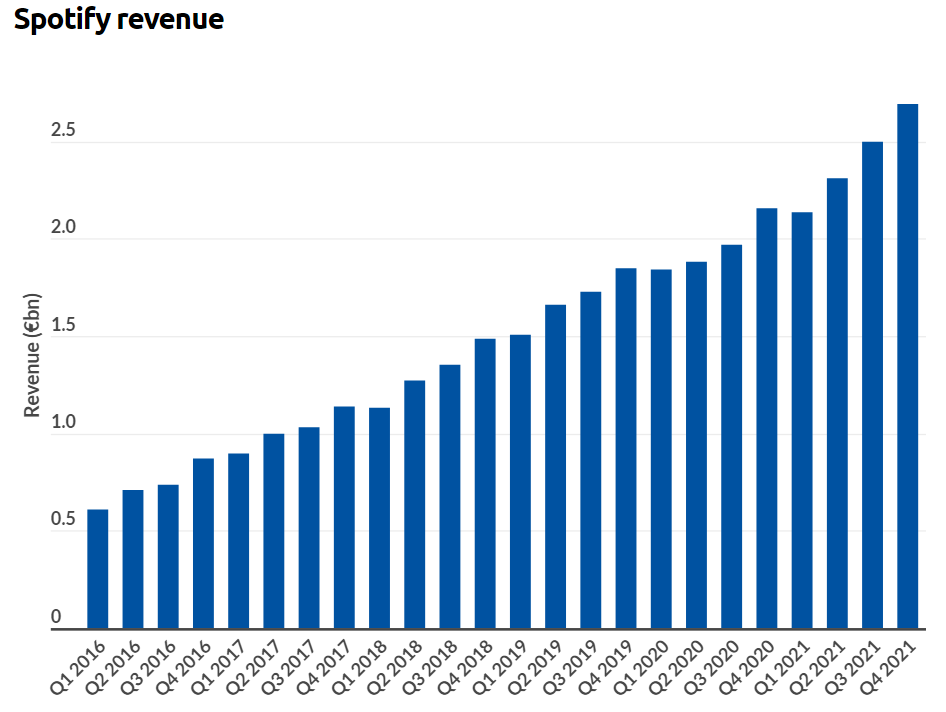

***

# Proposed Methodology

<div class="alert alert-block alert-info">
<b>Overall looking at the description of the data, it seems to be both a supervised as well as unsupervised learning problem, but we'll starting finding useful information first out of our data, post which we will focus on model building and its improvement.
<br><br>
The idea is to overall explore the data and find as much information as possible.
    So, to know about data we need to vizualize it properly. I used Seaborn, Matplotlib, Numpy, Pandas etc for data prepprocessing, vizualization etc
</div>

***

# Code/Output

***

<h2> IMPORTING REQUIRED LIBRARIES </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import mplcyberpunk

# Disabling in-line warnings in the Notebook. 
warnings.filterwarnings('ignore')

***

### <b>Using Pandas Library we can import the dataset into Jupyter Notebook by below commands</b>

In [2]:
spotify = pd.read_csv("top50.csv", encoding='cp1252')
spotify.head(10)

Unnamed: 0                         Track.Name    Artist.Name  \
0           1                           Señorita   Shawn Mendes   
1           2                              China       Anuel AA   
2           3      boyfriend (with Social House)  Ariana Grande   
3           4    Beautiful People (feat. Khalid)     Ed Sheeran   
4           5        Goodbyes (Feat. Young Thug)    Post Malone   
5           6  I Don't Care (with Justin Bieber)     Ed Sheeran   
6           7                             Ransom      Lil Tecca   
7           8                  How Do You Sleep?      Sam Smith   
8           9              Old Town Road - Remix      Lil Nas X   
9          10                            bad guy  Billie Eilish   

            Genre  Beats.Per.Minute  Energy  Danceability  Loudness..dB..  \
0    canadian pop               117      55            76              -6   
1  reggaeton flow               105      81            79              -4   
2       dance pop               190      80            40              -4   
3             pop                93      65            64              -8   
4         dfw rap               150      65            58              -4   
5             pop               102      68            80              -5   
6      trap music               180      64            75              -6   
7             pop               111      68            48              -5   
8     country rap               136      62            88              -6   
9      electropop               135      43            70             -11   

   Liveness  Valence.  Length.  Acousticness..  Speechiness.  Popularity  
0         8        75      191               4             3          79  
1         8        61      302               8             9          92  
2        16        70      186              12            46          85  
3         8        55      198              12            19          86  
4        11        18      175              45             7          94  
5         9        84      220               9             4          84  
6         7        23      131               2            29          92  
7         8        35      202              15             9          90  
8        11        64      157               5            10          87  
9        10        56      194              33            38          95

****

### As we can see there is an extra column with name <b>Unnamed: 0</b> which is of no use so I had removed using <i>drop</i> command from pandas library

In [3]:
spotify.drop("Unnamed: 0",axis=1, inplace=True)

***

<div class="alert alert-block alert-success">
<b>Head:</b> 
The head() function is used to get the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.</div>

In [4]:
spotify.head()

Track.Name    Artist.Name           Genre  \
0                         Señorita   Shawn Mendes    canadian pop   
1                            China       Anuel AA  reggaeton flow   
2    boyfriend (with Social House)  Ariana Grande       dance pop   
3  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76              -6         8        75   
1               105      81            79              -4         8        61   
2               190      80            40              -4        16        70   
3                93      65            64              -8         8        55   
4               150      65            58              -4        11        18   

   Length.  Acousticness..  Speechiness.  Popularity  
0      191               4             3          79  
1      302               8             9          92  
2      186              12            46          85  
3      198              12            19          86  
4      175              45             7          94

***

<div class="alert alert-block alert-success">
<b>Tail:</b> 
The tail() function in Python displays the last five rows of the dataframe by default. It takes in a single parameter: the number of rows. We can use this parameter to display the number of rows of our choice.
    </div>

In [5]:
spotify.tail()

Track.Name       Artist.Name    Genre  \
45                                One Thing Right        Marshmello  brostep   
46                                      Te Robaré         Nicky Jam    latin   
47                                        Happier        Marshmello  brostep   
48                                  Call You Mine  The Chainsmokers      edm   
49  Cross Me (feat. Chance the Rapper & PnB Rock)        Ed Sheeran      pop   

    Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  \
45                88      62            66              -2        58   
46               176      75            67              -4         8   
47               100      79            69              -3        17   
48               104      70            59              -6        41   
49                95      79            75              -6         7   

    Valence.  Length.  Acousticness..  Speechiness.  Popularity  
45        44      182               7             5          88  
46        80      202              24             6          88  
47        67      214              19             5          88  
48        50      218              23             3          88  
49        61      206              21            12          82

***

<div class="alert alert-block alert-success">
<b>Info:</b> 
The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).</div>

In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track.Name        50 non-null     object
 1   Artist.Name       50 non-null     object
 2   Genre             50 non-null     object
 3   Beats.Per.Minute  50 non-null     int64 
 4   Energy            50 non-null     int64 
 5   Danceability      50 non-null     int64 
 6   Loudness..dB..    50 non-null     int64 
 7   Liveness          50 non-null     int64 
 8   Valence.          50 non-null     int64 
 9   Length.           50 non-null     int64 
 10  Acousticness..    50 non-null     int64 
 11  Speechiness.      50 non-null     int64 
 12  Popularity        50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


***

<div class="alert alert-block alert-success">
<b>Describe:</b> 
The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column.</div>

In [7]:
spotify.describe()

Beats.Per.Minute     Energy  Danceability  Loudness..dB..   Liveness  \
count         50.000000  50.000000      50.00000       50.000000  50.000000   
mean         120.060000  64.060000      71.38000       -5.660000  14.660000   
std           30.898392  14.231913      11.92988        2.056448  11.118306   
min           85.000000  32.000000      29.00000      -11.000000   5.000000   
25%           96.000000  55.250000      67.00000       -6.750000   8.000000   
50%          104.500000  66.500000      73.50000       -6.000000  11.000000   
75%          137.500000  74.750000      79.75000       -4.000000  15.750000   
max          190.000000  88.000000      90.00000       -2.000000  58.000000   

        Valence.     Length.  Acousticness..  Speechiness.  Popularity  
count  50.000000   50.000000       50.000000     50.000000   50.000000  
mean   54.600000  200.960000       22.160000     12.480000   87.500000  
std    22.336024   39.143879       18.995553     11.161596    4.491489  
min    10.000000  115.000000        1.000000      3.000000   70.000000  
25%    38.250000  176.750000        8.250000      5.000000   86.000000  
50%    55.500000  198.000000       15.000000      7.000000   88.000000  
75%    69.500000  217.500000       33.750000     15.000000   90.750000  
max    95.000000  309.000000       75.000000     46.000000   95.000000

***

<div class="alert alert-block alert-success">
<b>Check For Null Values:</b> The given command of isnull is used to check whether is there any null, na values present in our dataset. We can fill those values by using mean, median or mode values by using fillna command in pandas library
</div>

In [8]:
spotify.isnull().sum()

Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

***

## Let's Dive Into Dataset

***

<div class="alert alert-block alert-info">
<b><h3>What's the most Energetic Song? ⚡⚡</h3></b> <br>
    <b>Never Really Over Song</b> By <i>Katy Perry</i> is the most Energetic Song in Spotify Analysis
</div>

In [9]:
spotify[spotify["Energy"] == spotify["Energy"].max()]

Track.Name Artist.Name      Genre  Beats.Per.Minute  Energy  \
34  Never Really Over  Katy Perry  dance pop               100      88   

    Danceability  Loudness..dB..  Liveness  Valence.  Length.  Acousticness..  \
34            77              -5        32        39      224              19   

    Speechiness.  Popularity  
34             6          89

***

<div class="alert alert-block alert-info">
<b><h3>Which song has most danceability factor? 🕺💃</h3></b>
    <br>
    <b> Talk </b> Song by <i> Khalid</i> is considered as most Danceable Song in Spotify Analysis
</div>

In [10]:
spotify[spotify["Danceability"] == spotify["Danceability"].max()]

Track.Name Artist.Name Genre  Beats.Per.Minute  Energy  Danceability  \
43       Talk      Khalid   pop               136      40            90   

    Loudness..dB..  Liveness  Valence.  Length.  Acousticness..  Speechiness.  \
43              -9         6        35      198               5            13   

    Popularity  
43          84

***

<div class="alert alert-block alert-info">
<b><h3>Which Song Is More Loud? 🔊📢</h3></b>
    <br>
    <b> One Thing Right, Otro Trago - Remix </b> Song by <i> Marshmello and Sech</i> respectively are considered as most Loud Songs in Spotify Analysis
</div>

In [11]:
spotify[spotify["Loudness..dB.."] == spotify["Loudness..dB.."].max()]

Track.Name Artist.Name           Genre  Beats.Per.Minute  Energy  \
13  Otro Trago - Remix        Sech  panamanian pop               176      79   
45     One Thing Right  Marshmello         brostep                88      62   

    Danceability  Loudness..dB..  Liveness  Valence.  Length.  Acousticness..  \
13            73              -2         6        76      288               7   
45            66              -2        58        44      182               7   

    Speechiness.  Popularity  
13            20          87  
45             5          88

***

<div class="alert alert-block alert-info">
<b><h3>Which song is the most Lively? 💓💓</h3></b>
    <br>
    <b> One Thing Right</b> Song by <i> Marshmello <i> is considered as most Lively song in Spotify Analysis
</div>

In [12]:
spotify[spotify['Liveness'] == spotify['Liveness'].max()]

Track.Name Artist.Name    Genre  Beats.Per.Minute  Energy  \
45  One Thing Right  Marshmello  brostep                88      62   

    Danceability  Loudness..dB..  Liveness  Valence.  Length.  Acousticness..  \
45            66              -2        58        44      182               7   

    Speechiness.  Popularity  
45             5          88

***

<div class="alert alert-block alert-info">
    <b><h3>Which song is most lengthy one? ⏳⏳</h3></b>
    <br>
    <b> No Me Conoce - Remix</b> Song by <i> Jhay Cortez <i> is considered as most Lengthy song in Spotify Analysis
</div>

In [13]:
spotify[spotify['Length.'] == spotify["Length."].max()]

Track.Name  Artist.Name           Genre  Beats.Per.Minute  \
22  No Me Conoce - Remix  Jhay Cortez  reggaeton flow                92   

    Energy  Danceability  Loudness..dB..  Liveness  Valence.  Length.  \
22      79            81              -4         9        58      309   

    Acousticness..  Speechiness.  Popularity  
22              14             7          83

***

<div class="alert alert-block alert-info">
<b> <h3>Which song is most Popular? 🎉🎉</h3></b>
    <br>
    <b> Bad Guy</b> Song by <i> Billie Eilish <i> is considered as most Popular song in Spotify Analysis
</div>

In [14]:
spotify[spotify['Popularity'] == spotify["Popularity"].max()]

Track.Name    Artist.Name       Genre  Beats.Per.Minute  Energy  \
9    bad guy  Billie Eilish  electropop               135      43   

   Danceability  Loudness..dB..  Liveness  Valence.  Length.  Acousticness..  \
9            70             -11        10        56      194              33   

   Speechiness.  Popularity  
9            38          95

***

## Data Vizualization

<h3> We can see from above imported libraries, I had used both <i> Matplotlib</i> and <i> Seaborn</i> for Data Vizualization and used various types of graphs such as:
    <ol>
        <li>Bar Graph</li>
        <li>Count Graph</li>
        <li>Reg Plot</li>
        <li>Lm Plot</li>
        <li> Pie Chart</li>
        <li> Hist Plot</li>
        <li> Dist Plot</li>
        <li> Swarm Plot</li>
        <li> Box Plot</li>
    </ol>
</h3>

<div class="alert alert-block alert-info">
    <b><h3>Plotting Graph for number of Songs by each Singer </h3> </b>
    <br>
    <b> We can see that songs by Ed Sheeran appear 4 times in the top 50 list and Billie Ellish, Post Malone, Sech and Lil Nas X each appear twice.
</div>

<div class="alert alert-block alert-success">
    <b><h3>Ed Sheeran</h3></b><br><b> So it seems that Ed Sheeran has a huge fan following as even though his songs do not have the highest popularity but it has the highest frequency in the Top 50 list of spotify which means that there are more number of songs by Ed Sheeran in Top 50 than any other artist.
</div>

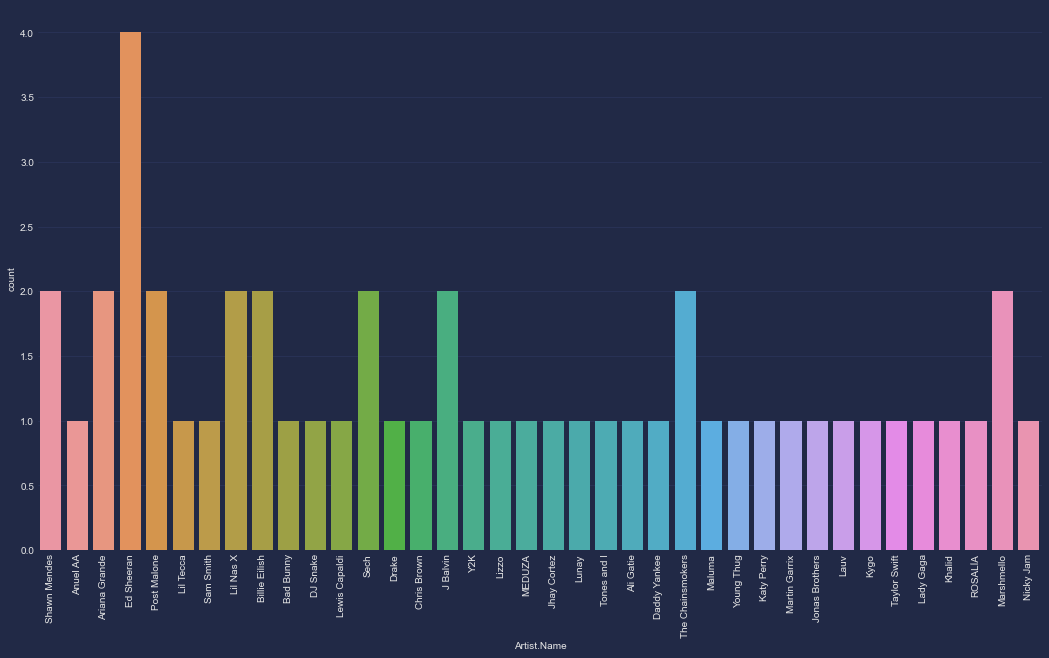

In [15]:
plt.style.use('cyberpunk')
plt.figure(figsize=(18,10))
sns.countplot(x="Artist.Name", data=spotify)
plt.xticks(rotation=90);

***

<div class="alert alert-block alert-info">
    <b><h3> Songs Based on Genre </h3></b><br><b> We can clearly see that there are more pop songs released than any other in that particular year.
As we have said that sometimes even the status of the artist and genre of the artist matters.Let us look at the plots below which shows about the status and genre of song having impact on the popularity of the song.
</div>

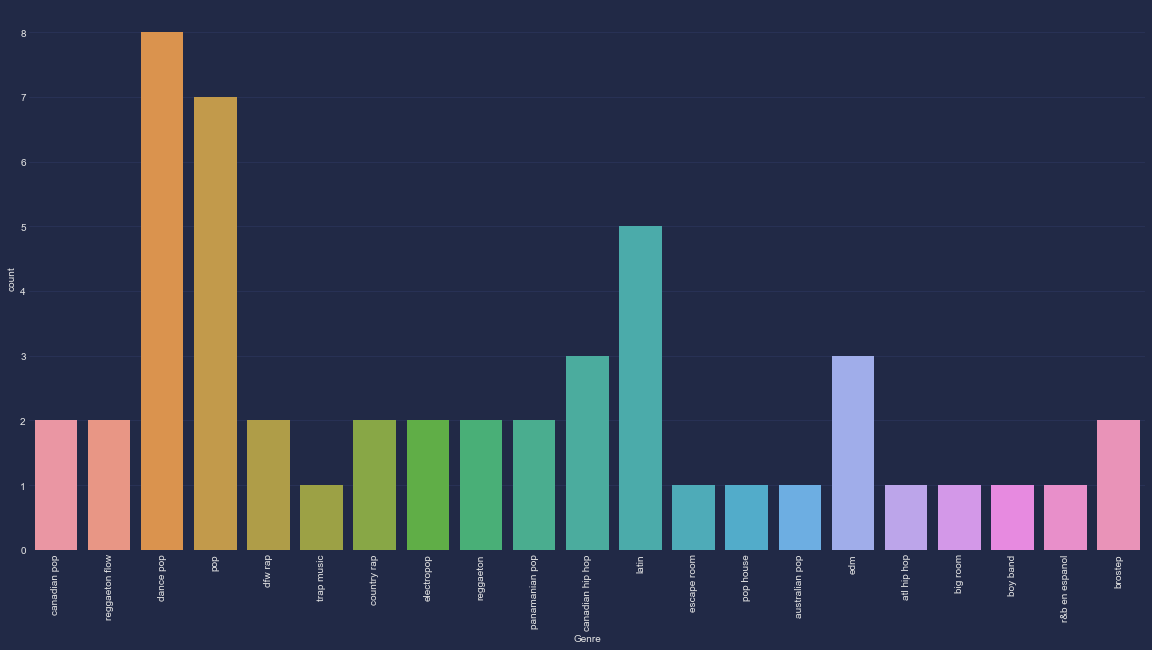

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(spotify['Genre'])
plt.xticks(rotation=90)
plt.show()

***

## Data Preprocessing
### Let's Process and dig  something from this raw data

***

<div class="alert alert-block alert-success">
    <b><h3> Genre Column </h3></b> <br><b>Let's look at the Genre column once closely to see if we can find some meaningful information. 
From the earlier output of sample rows, we could see that keywords like "pop" 
which is a very casual nature of music is available in many Genres of many songs but is represented in different ways. 
We can perform some data cleaning there to get the actual Genre of the song, wherever applicable/possible.
</div>

***

In [17]:
spotify["Genre"].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
brostep             2
country rap         2
reggaeton           2
electropop          2
panamanian pop      2
reggaeton flow      2
dfw rap             2
canadian pop        2
escape room         1
trap music          1
pop house           1
australian pop      1
boy band            1
atl hip hop         1
big room            1
r&b en espanol      1
Name: Genre, dtype: int64

In [18]:
# Selecting rows where Genre contains the word "pop"
spotify[spotify['Genre'].str.contains('pop')]

Track.Name    Artist.Name  \
0                                            Señorita   Shawn Mendes   
2                       boyfriend (with Social House)  Ariana Grande   
3                     Beautiful People (feat. Khalid)     Ed Sheeran   
5                   I Don't Care (with Justin Bieber)     Ed Sheeran   
7                                   How Do You Sleep?      Sam Smith   
9                                             bad guy  Billie Eilish   
11              Loco Contigo (feat. J. Balvin & Tyga)       DJ Snake   
12                                  Someone You Loved  Lewis Capaldi   
13                                 Otro Trago - Remix           Sech   
15                          No Guidance (feat. Drake)    Chris Brown   
20                                Piece Of Your Heart         MEDUZA   
24                       bad guy (with Justin Bieber)  Billie Eilish   
25                                If I Can't Have You   Shawn Mendes   
26                                       Dance Monkey    Tones and I   
31                                            7 rings  Ariana Grande   
34                                  Never Really Over     Katy Perry   
36                                         Otro Trago           Sech   
37                     Antisocial (with Travis Scott)     Ed Sheeran   
39  fuck, i'm lonely (with Anne-Marie) - from “13 ...           Lauv   
41                              You Need To Calm Down   Taylor Swift   
42                                            Shallow      Lady Gaga   
43                                               Talk         Khalid   
49      Cross Me (feat. Chance the Rapper & PnB Rock)     Ed Sheeran   

             Genre  Beats.Per.Minute  Energy  Danceability  Loudness..dB..  \
0     canadian pop               117      55            76              -6   
2        dance pop               190      80            40              -4   
3              pop                93      65            64              -8   
5              pop               102      68            80              -5   
7              pop               111      68            48              -5   
9       electropop               135      43            70             -11   
11       dance pop                96      71            82              -4   
12             pop               110      41            50              -6   
13  panamanian pop               176      79            73              -2   
15       dance pop                93      45            70              -7   
20       pop house               124      74            68              -7   
24      electropop               135      45            67             -11   
25    canadian pop               124      82            69              -4   
26  australian pop                98      59            82              -6   
31       dance pop               140      32            78             -11   
34       dance pop               100      88            77              -5   
36  panamanian pop               176      70            75              -5   
37             pop               152      82            72              -5   
39       dance pop                95      56            81              -6   
41       dance pop                85      68            77              -6   
42       dance pop                96      39            57              -6   
43             pop               136      40            90              -9   
49             pop                95      79            75              -6   

    Liveness  Valence.  Length.  Acousticness..  Speechiness.  Popularity  
0          8        75      191               4             3          79  
2         16        70      186              12            46          85  
3          8        55      198              12            19          86  
5          9        84      220               9             4          84  
7          8        35      202              15             9

***

<div class="alert alert-block alert-danger">
    <b><h3> Pop Alert ⚠️⚠️</h3></b><br><b> Clearly out of 50 songs, 23 belongs to Pop. Let's see what other Genres are available.
</div>

In [19]:
spotify[spotify['Genre'].str.contains('pop')].count()

Track.Name          23
Artist.Name         23
Genre               23
Beats.Per.Minute    23
Energy              23
Danceability        23
Loudness..dB..      23
Liveness            23
Valence.            23
Length.             23
Acousticness..      23
Speechiness.        23
Popularity          23
dtype: int64

***

In [20]:
# Checking rows with Genre other than Pop
spotify[~spotify['Genre'].str.contains('pop')].head()

Track.Name  Artist.Name           Genre  \
1                         China     Anuel AA  reggaeton flow   
4   Goodbyes (Feat. Young Thug)  Post Malone         dfw rap   
6                        Ransom    Lil Tecca      trap music   
8         Old Town Road - Remix    Lil Nas X     country rap   
10                     Callaita    Bad Bunny       reggaeton   

    Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  \
1                105      81            79              -4         8   
4                150      65            58              -4        11   
6                180      64            75              -6         7   
8                136      62            88              -6        11   
10               176      62            61              -5        24   

    Valence.  Length.  Acousticness..  Speechiness.  Popularity  
1         61      302               8             9          92  
4         18      175              45             7          94  
6         23      131               2            29          92  
8         64      157               5            10          87  
10        24      251              60            31          93

***

<div class="alert alert-block alert-success">
    <b><h3> Songs other than Pop </h3></b> <br><b>It seems we have some songs which are either Latin or Rap. let's check them one after another.
</div>

In [21]:
spotify[spotify['Genre'].str.contains('latin')].count()

Track.Name          5
Artist.Name         5
Genre               5
Beats.Per.Minute    5
Energy              5
Danceability        5
Loudness..dB..      5
Liveness            5
Valence.            5
Length.             5
Acousticness..      5
Speechiness.        5
Popularity          5
dtype: int64

In [22]:
spotify[spotify['Genre'].str.contains('rap')].count()

Track.Name          5
Artist.Name         5
Genre               5
Beats.Per.Minute    5
Energy              5
Danceability        5
Loudness..dB..      5
Liveness            5
Valence.            5
Length.             5
Acousticness..      5
Speechiness.        5
Popularity          5
dtype: int64

***

<div class="alert alert-block alert-danger">
    <b><h3> Hip-Hop</h3></b><br><b> From above analysis we can see that after Pop, Latin and Rap we have Hip Hop songs which are more in number
</div>

In [23]:
spotify[spotify['Genre'].str.contains('hip')].count()

Track.Name          4
Artist.Name         4
Genre               4
Beats.Per.Minute    4
Energy              4
Danceability        4
Loudness..dB..      4
Liveness            4
Valence.            4
Length.             4
Acousticness..      4
Speechiness.        4
Popularity          4
dtype: int64

***

<div class="alert alert-block alert-info">
    <b><h3>Cleaning Genre column</h3></b>
        <br><b>As we can see that there are <i>23</i> different songs related to pop but there are in different categories. So, lets combine all the columns which falls under pop sector into a single column as <i> Pop </i>. Same way for remaining genres like <i>latin, Rap and Hip-Hop</i>.
</div>

In [24]:
# Imputing values for Pop Genre
spotify.loc[spotify['Genre'].str.contains('pop', case=False), 'Genre'] = 'Pop'

In [25]:
# Imputing values for Latin Genre
spotify.loc[spotify['Genre'].str.contains('latin', case=False), 'Genre'] = 'Latin'

In [26]:
# Imputing values for Rap Genre
spotify.loc[spotify['Genre'].str.contains('rap', case=False), 'Genre'] = 'Rap'

In [27]:
# Imputing values for Hip-Hop Genre
spotify.loc[spotify['Genre'].str.contains('hip', case=False), 'Genre'] = 'Hip-Hop'

***

<div class="alert alert-block alert-success">
    <b><h3> Genre </h3></b> <br><b>Now, you can see that they are finally differentiated under single heading
</div>

In [28]:
spotify["Genre"].value_counts()

Pop               23
Latin              5
Rap                5
Hip-Hop            4
edm                3
reggaeton flow     2
brostep            2
reggaeton          2
r&b en espanol     1
boy band           1
big room           1
escape room        1
Name: Genre, dtype: int64

***

## Let's Plot the Genre Column



<div class="alert alert-block alert-success">
    <b><h3> Pop 🎶🎶</h3></b> <br><b>Overall now we have seen the patterns in Genre of our Data. It is clear that Pop Genre is the most liked songs in the Top 50 songs list.
</div>

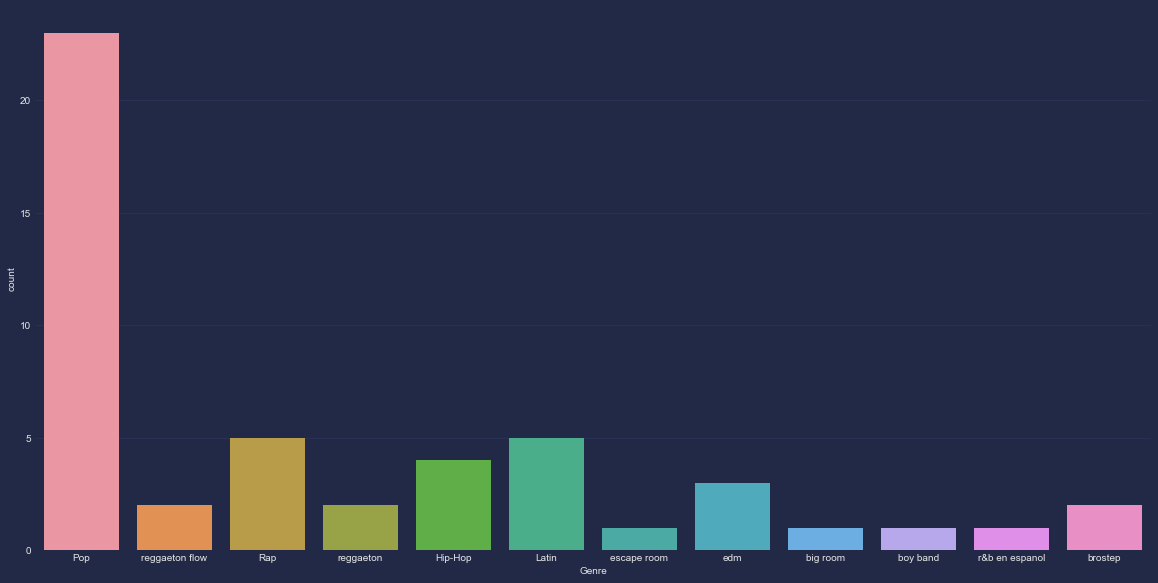

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x="Genre", data=spotify);

***

In [30]:
count = 0
for i in spotify["Beats.Per.Minute"]:
    if i<105:
        count = count + 1
print(count)

25


<div class="alert alert-block alert-success">
    <b><h3> Beats Per Minute </h3></b> <br><b>We can see even though these 50 songs are most played, listened in that particular year. But, there is a drastic difference in each of the singer's choice and songs. As there are more than <i>25</i> songs which are having less than <i>105</i> BPM and highest lies somewhere around <i>190</i> 
</div>

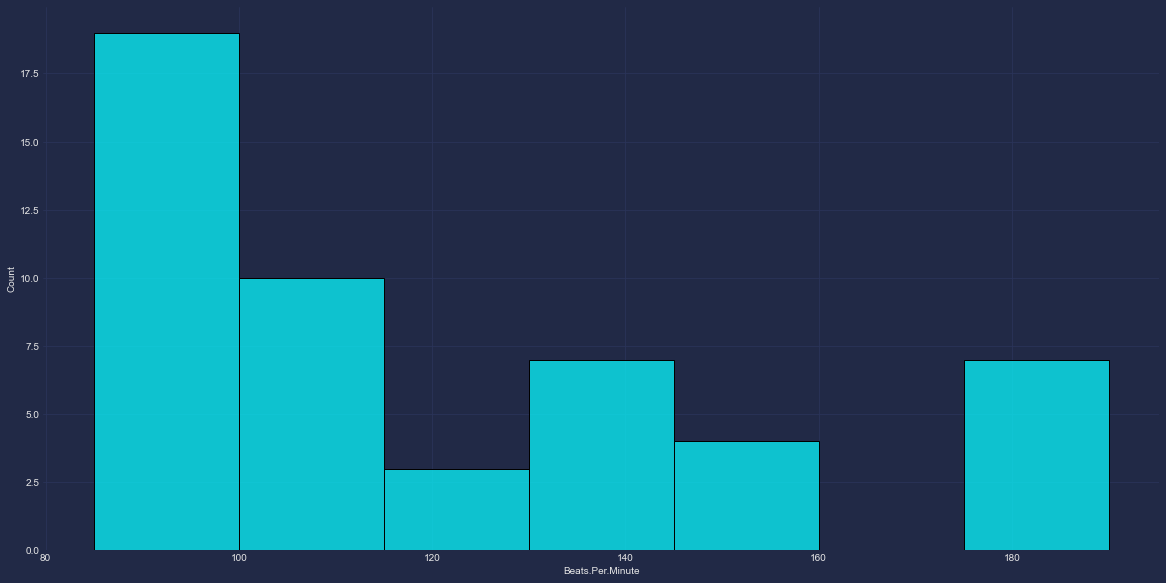

In [31]:
plt.figure(figsize=(20,10))
sns.histplot(x="Beats.Per.Minute", data=spotify);

***

<div class="alert alert-block alert-success">
    <b><h3> Danceability and Energy 🕺💃 </h3></b> <br>
    <b>Before the 80s, the danceability of a song was not very relevant to its hit potential. From then on, danceable songs were more likely to become a hit.It’s obvious that the majority of the top tracks have a high danceability ratings
    <b>We can observe that when energy level around 78-82 and Danceability around 65-70 most songs were played most number of times and next comes when the range is around 66-71 and 78-82 respectively</div>

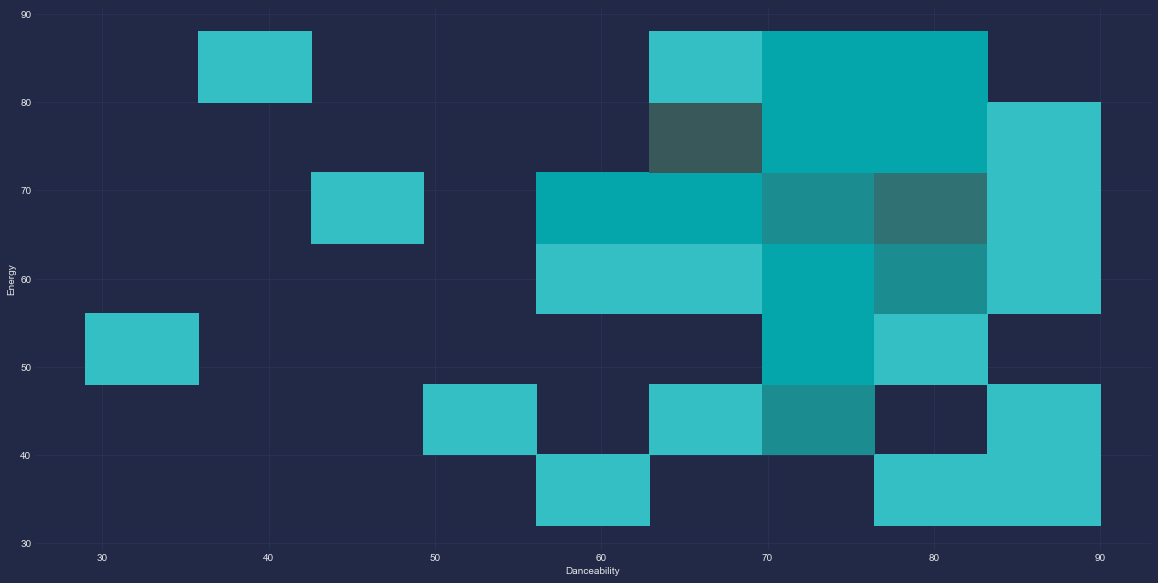

In [32]:
plt.figure(figsize=(20,10))
sns.histplot(x="Danceability", y="Energy", data=spotify);

***

<div class="alert alert-block alert-success">
    <b><h3> WordCloud On Singers 🎤🎤 </h3></b> <br>
    <b> Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency. We can see <i>Ed Sheeran</i> is the most popular singer and then follows Ariana Grande, Shawn Mendes, Lil Nax, and etc.
    <b></div>

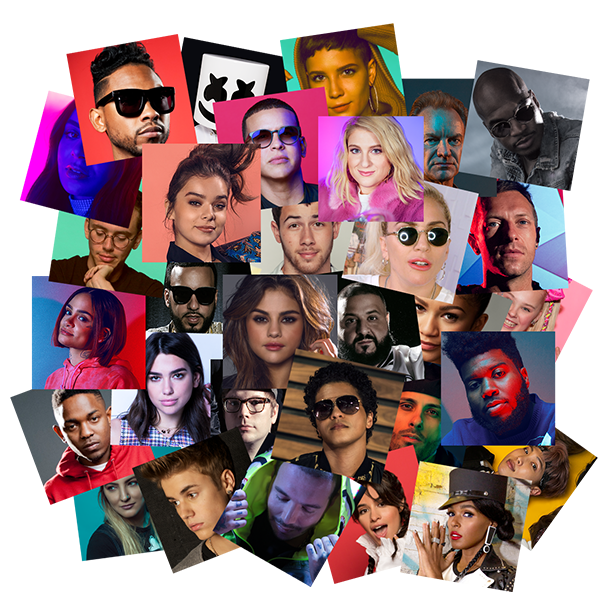

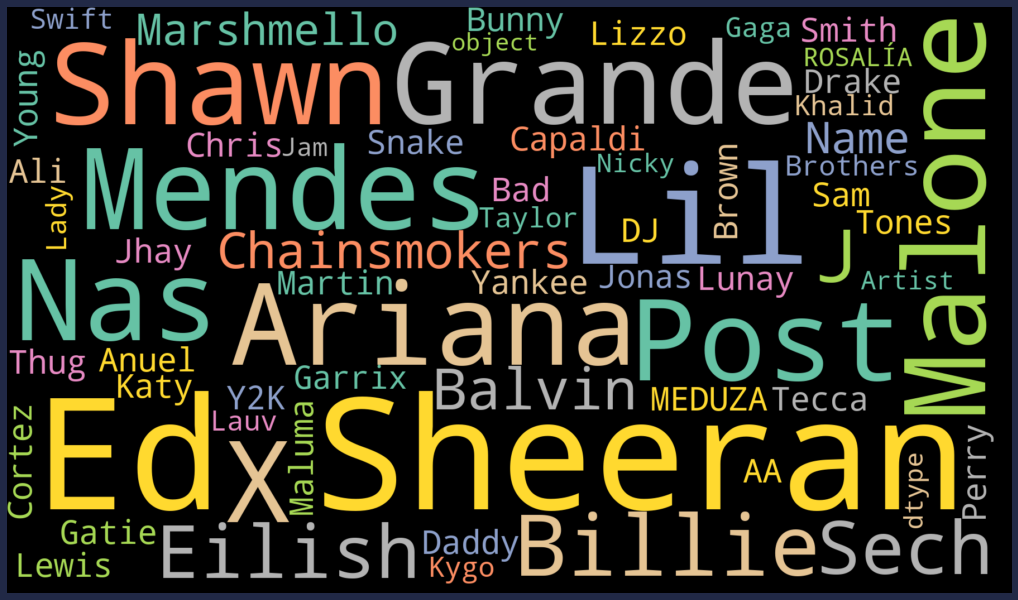

In [33]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=1800, height=1050, margin=3,background_color='black', colormap='Set2').generate(str(spotify["Artist.Name"]))
plt.figure(figsize=(18,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***

<div class="alert alert-block alert-success">
    <b><h3> Popularity and Genre</h3></b><br>
    <b>As we knew that pop genre is the most played and listened song but we haven't plotted it. So, let's see how it dominates in popularity wise.
       
</div>

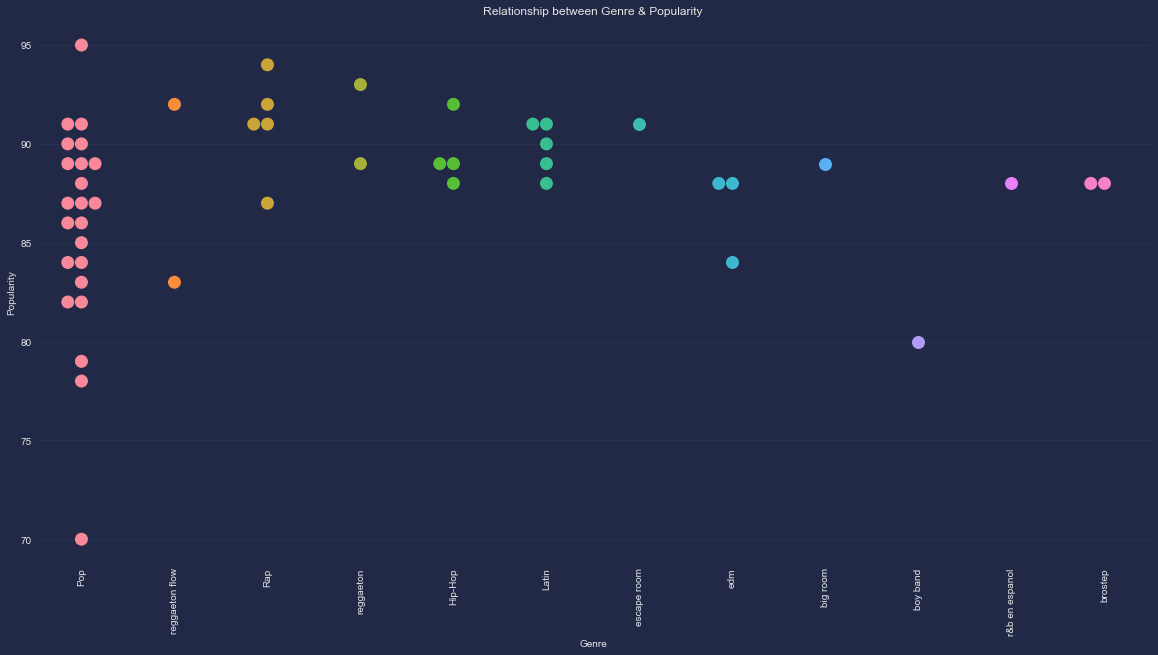

In [34]:
#Visualization of relationship between genre and popularity using SwarmPlot

plt.figure(figsize=(20,10))
swarmplot=sns.swarmplot(x="Genre",y="Popularity",data=spotify, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between Genre & Popularity");

***

***

<div class="alert alert-block alert-success">
    <b><h3> Beats Per Minute and Arstists Compared to Popularity </h3></b> <br>
    <b> As by studying the given data set we can predict that more the value of BPM more the popularity of a song lets see which singer had used it most!!!
    <b></div>

<div class="alert alert-block alert-info">
    <b><h3>Ed Sheeran Again 🥇🥇</h3></b>
    <br><b>Here We can that the most BPM id for <i> Ariana Grande </i>. But <i> Ed Sheeran </i> had used BPM around 100-140 which is more than mean of the other singers but has gained the popularity of 95 which is highest among all.
</div>

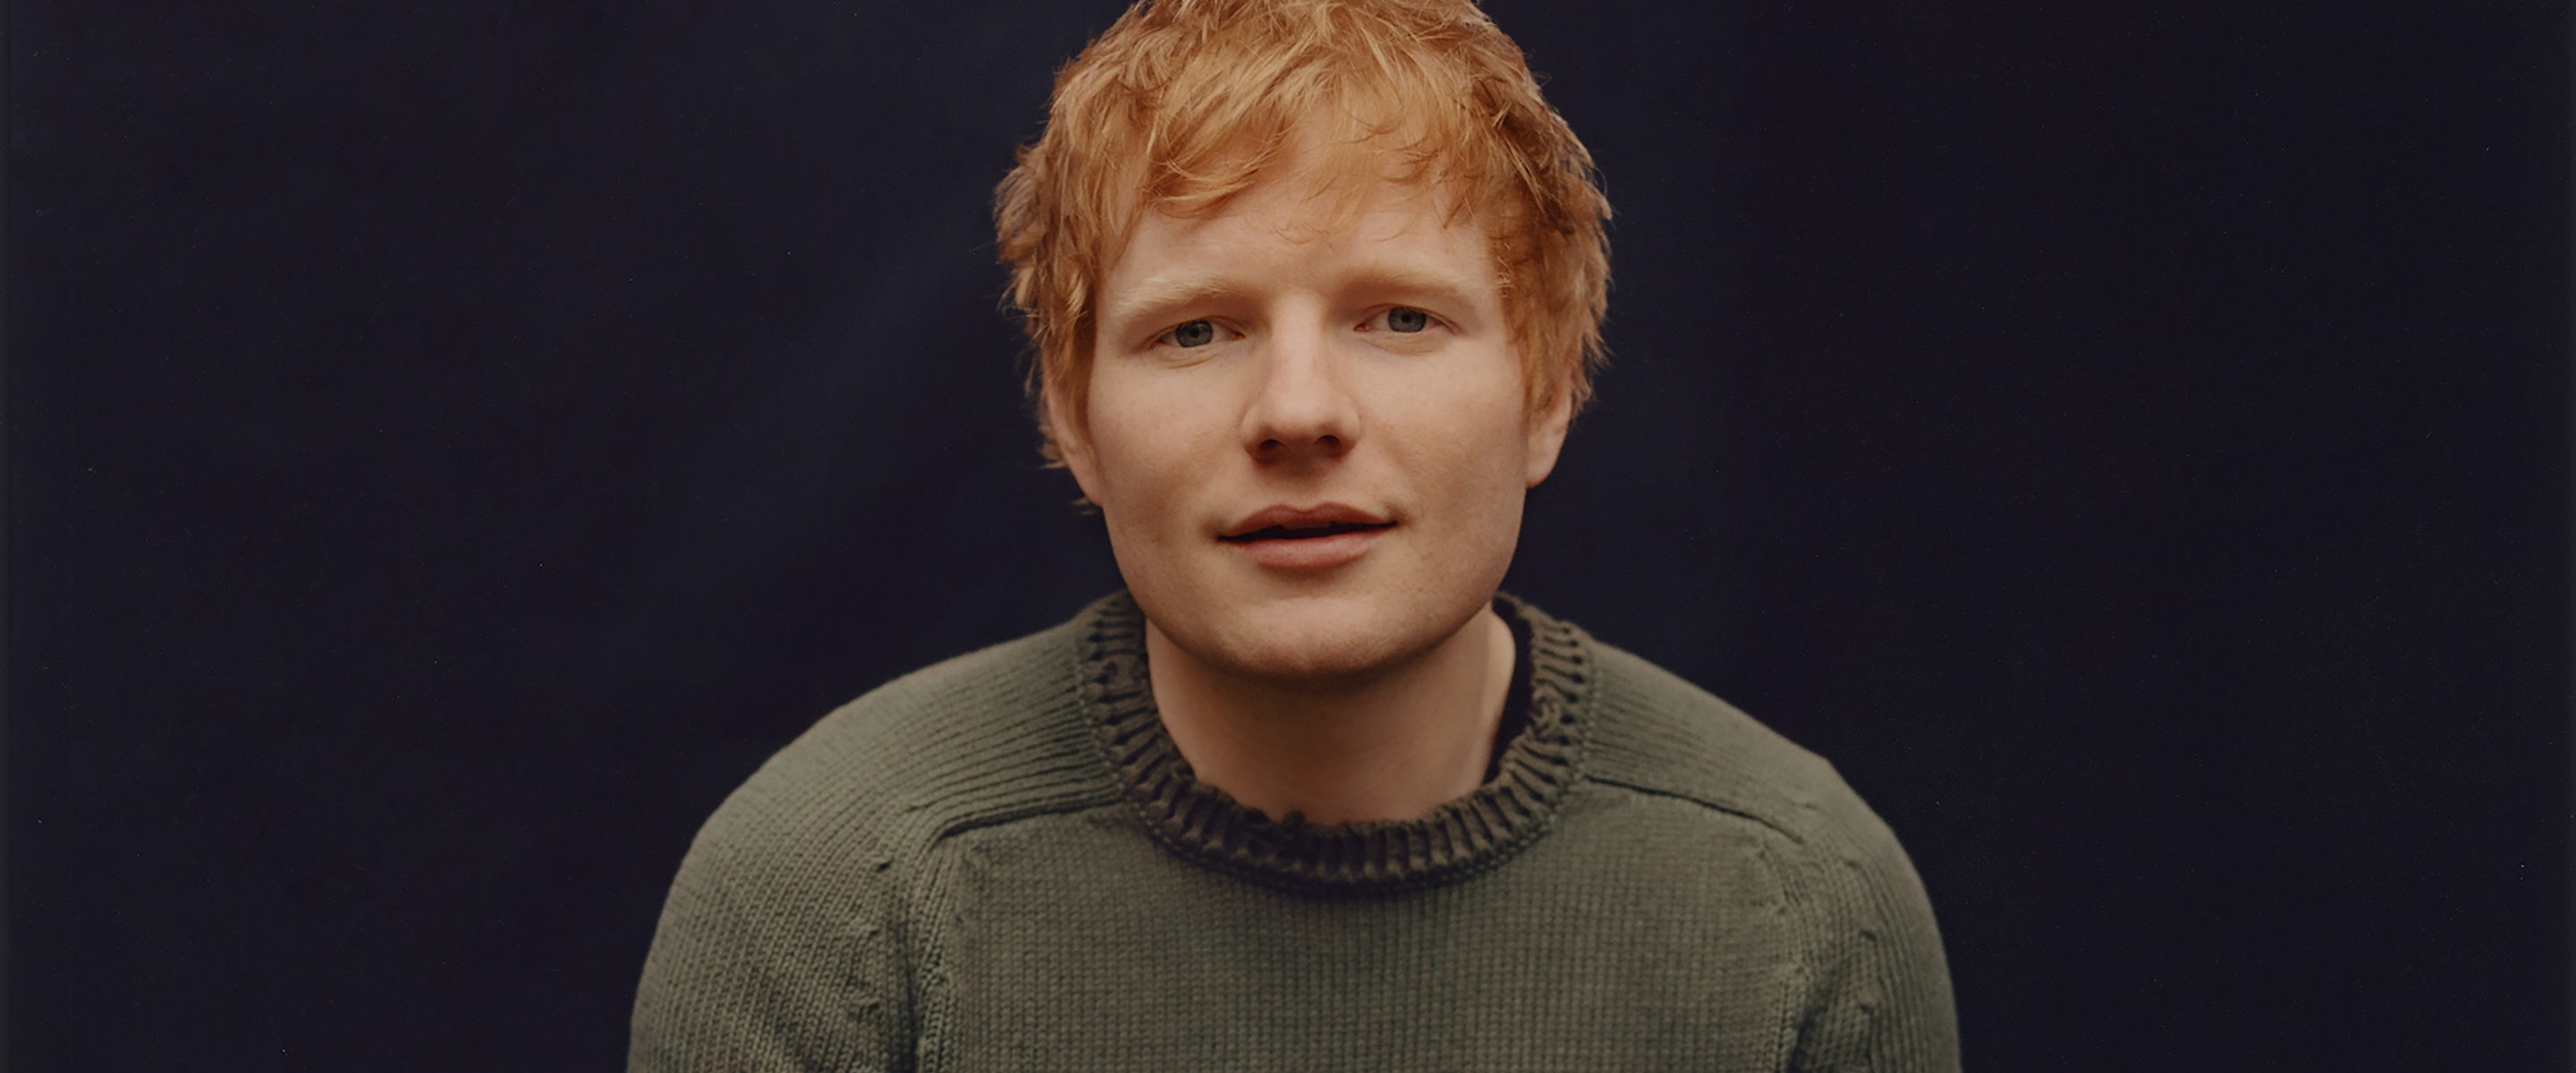

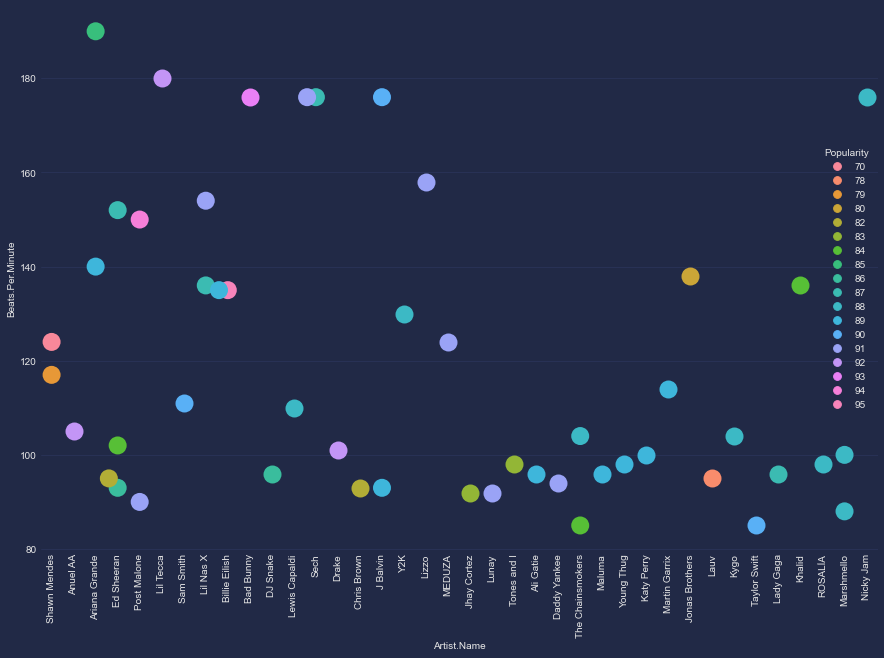

In [35]:

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.swarmplot(x="Artist.Name", y="Beats.Per.Minute",hue="Popularity", s=18,data=spotify);
plt.xticks(rotation=90);

***

<div class="alert alert-block alert-success">
    <b><h3> Energy and Loudness 🔊🔊</h3></b> <br>
    <b>We can even see from the above distribution plot that the songs which have energy values between 65 to 70 have higher occurences in the top list
    <b></div>

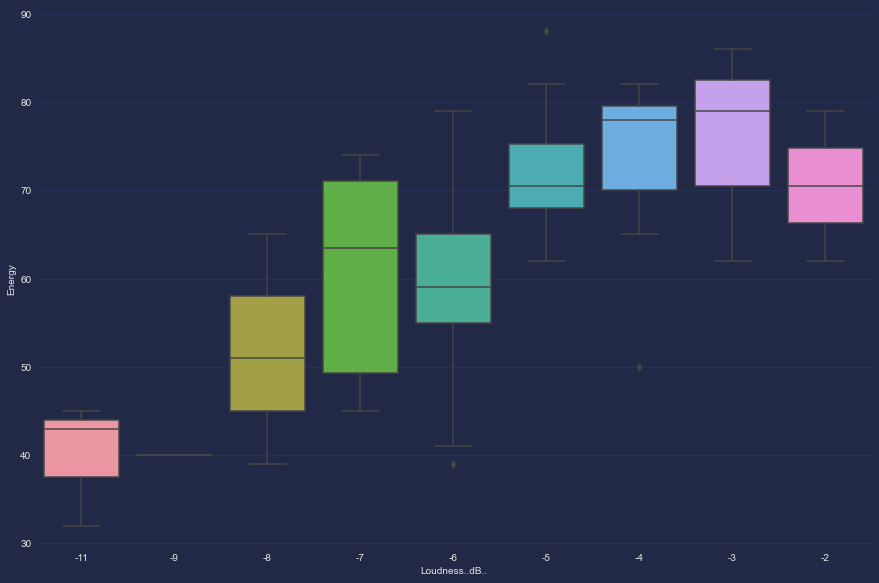

In [36]:
# Box plot of the relationship between Loudness..dB..and Energy
plt.figure(figsize=(15,10));
sns.boxplot(x = "Loudness..dB..", y = "Energy", data = spotify);

***

<div class="alert alert-block alert-success">
    <b><h3> Energy and Popularity ⚡⚡ </h3></b> <br>
    <b>Similary, popularity and energy follow a positive correlance. As the energy increases, so does the popularity and vice versa.
    <b></div>

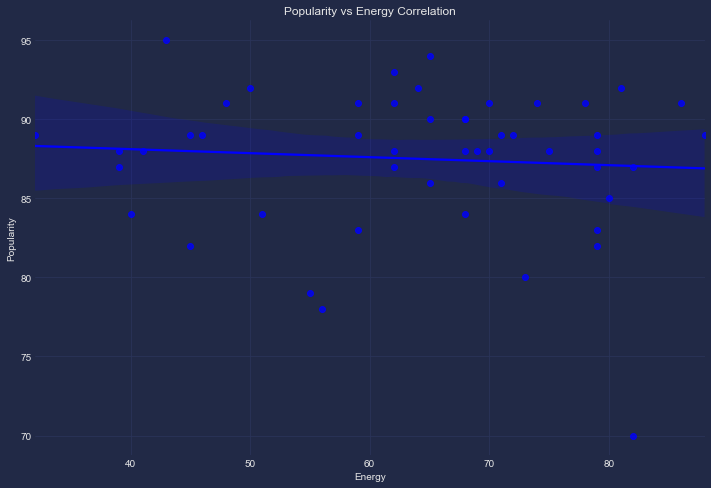

In [37]:
plt.figure(figsize=(12,8))
sns.regplot(data=spotify, y="Popularity", x="Energy", color="b").set(title="Popularity vs Energy Correlation");

***

<div class="alert alert-block alert-info">
    <b><h3>Popularity</h3></b>
    
</div>

In [38]:
spotify['Popularity'] = spotify['Popularity'].astype('int')
spotify.sort_values('Popularity', ascending=False).head(10)[['Popularity', 'Artist.Name']]

Popularity    Artist.Name
9           95  Billie Eilish
4           94    Post Malone
10          93      Bad Bunny
14          92          Drake
1           92       Anuel AA
6           92      Lil Tecca
36          91           Sech
21          91      Lil Nas X
20          91         MEDUZA
19          91          Lizzo

***

<div class="alert alert-block alert-success">
    <b><h3>Artist & Popularity 📈📈</h3></b>
    <br><b>Following is a Seaborn Bar plot for Artist against their Popularity for their songs in that particular year analysis
</div>

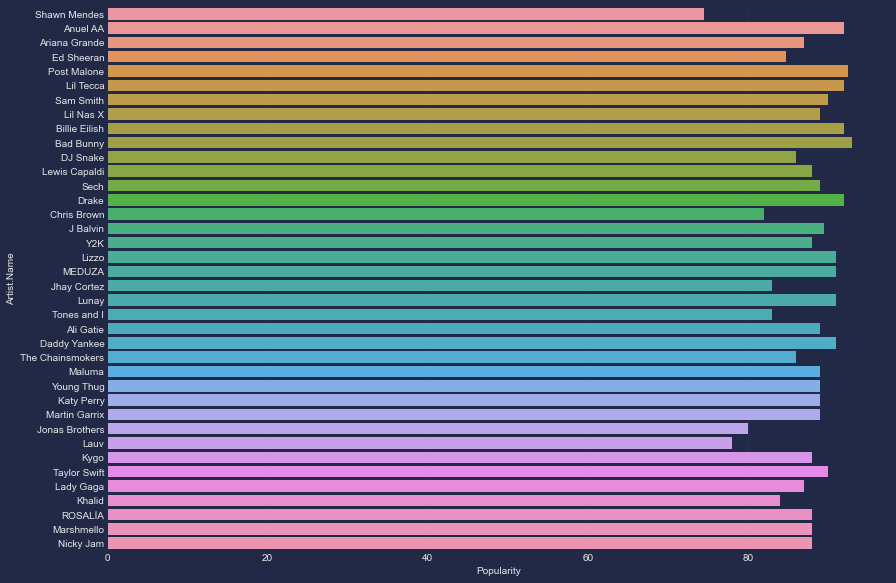

In [39]:
plt.figure(figsize=(14,10))
sns.barplot(y="Artist.Name", x="Popularity", data= spotify, ci=None);

***

<div class="alert alert-block alert-success">
    <b><h3>Artist & Acousticness</h3></b>
    <br><b> Acoustic music is music that solely or primarily uses instruments that produce sound.Simply higher the value higher the value of the song.
</div>

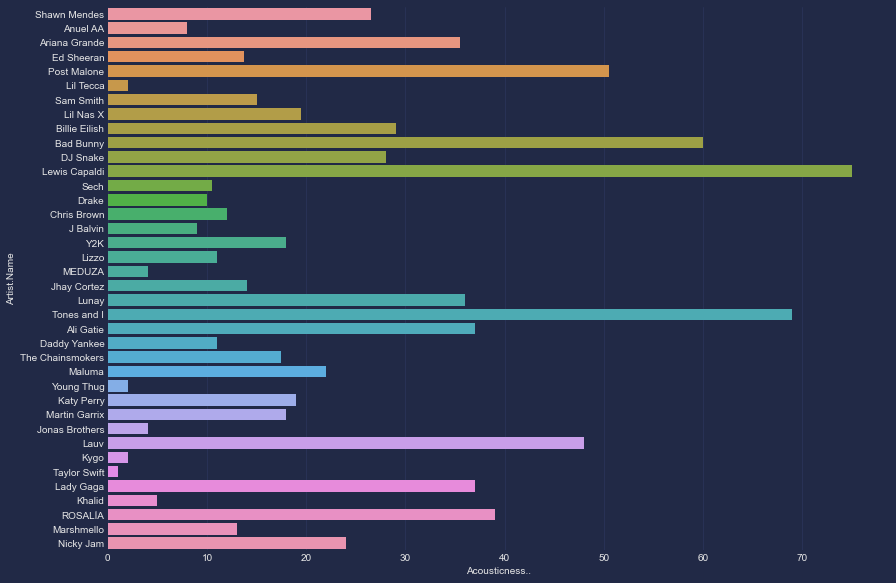

In [40]:
plt.figure(figsize=(14,10))
sns.barplot(y="Artist.Name", x="Acousticness..", data= spotify, ci=None);

***

<div class="alert alert-block alert-info">
    <b><h3>Pie chart Of Artist and their Popularity</h3></b>
    
</div>

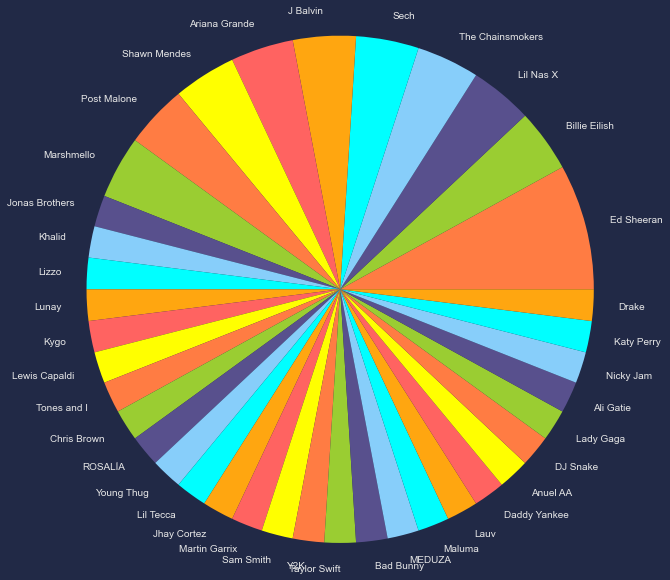

In [41]:
#Pie charts 
labels = spotify['Artist.Name'].value_counts().index
sizes = spotify['Artist.Name'].value_counts().values
colors = ['#ff7c43', 'yellowgreen', '#58508d', 'lightskyblue','cyan', '#ffa610', '#ff6361','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.5f%%')
plt.axis('equal')
plt.show()

***

<div class="alert alert-block alert-info">
    <b><h3>Subplots Of Various features</h3></b>
    <br>
    <b> Given below are the subplots of various graphs for the songs of different features and how they vary to each other
</div>

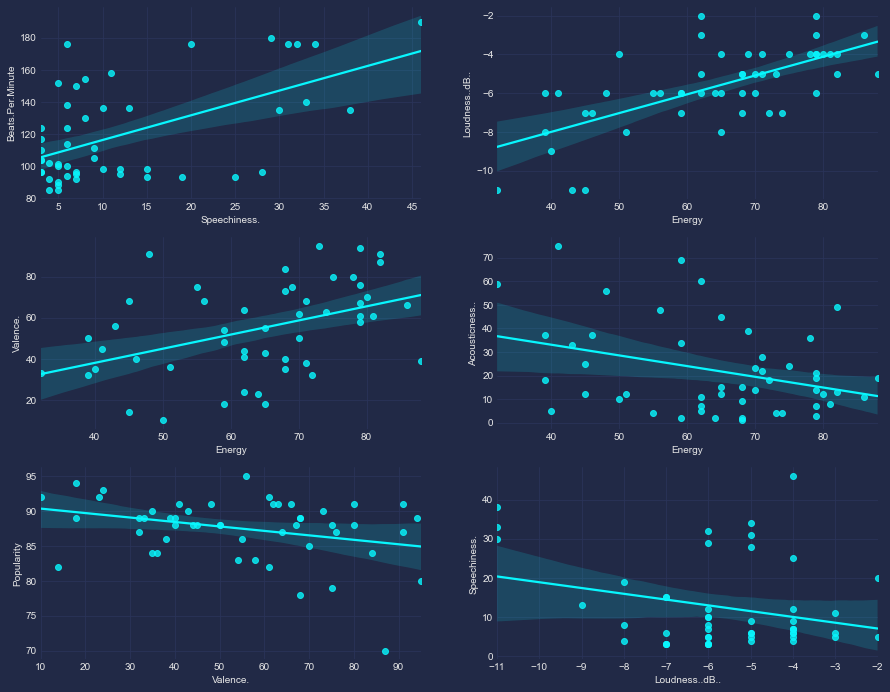

In [42]:
fig, axes = plt.subplots(3,2, figsize=(15,12))
sns.regplot(x='Speechiness.',y='Beats.Per.Minute',data=spotify, ax = axes[0,0])
sns.regplot(x='Energy',y='Loudness..dB..',data=spotify, ax = axes[0,1])
sns.regplot(x='Energy',y='Valence.',data=spotify, ax = axes[1,0])
sns.regplot(x='Energy',y='Acousticness..',data=spotify, ax = axes[1,1])
sns.regplot(x='Valence.',y='Popularity',data=spotify, ax=axes[2,0])
sns.regplot(x='Loudness..dB..',y='Speechiness.',data=spotify, ax = axes[2,1]);

***

<div class="alert alert-block alert-danger">
    <b><h3>Heat Map</h3></b>
    <br>
    <b> We see no linear relationships amongst any of the numerical variables. Also, other than popularity and some other columns, we see that for almost all of the cases the Pop Genre has the higher distribution than other Genres, which is also obvious. We can try to look at the data again to see if they have any regression properties.
</div>

<div class="alert alert-block alert-info">
    <b><h3>Key Points 📖📖</h3></b>
    <br>
    <b> Overall it seems that other than the Speechiness of any song, there is no linear relationship with any other features/columns with the Popularity of the song. We may later try to fit a Multiple Linear regression problem to find a model for predicting the Popularity of a song and the variables effecting or resulting into Popularity of a song. Also, we can shorten the dataset with only the top 4 Genres of songs (Pop, Latin, Hip-Hop and Rap) and try to fit a Clustering algorithm to see the clusters of data,
</div>

<div class="alert alert-block alert-success">
    <b><h3>What I See 👀👀</h3></b>
    <br><b> Some correlation found:

- Positive correlation
    1. Speechness and Beats per Minute
    2. Enery and Loudness
    3. Energy and Valence
- Negative correlation
    1. Energy and Acousticness
    2. Valence and Popularity
    3. Loudness and Speechness
</div>

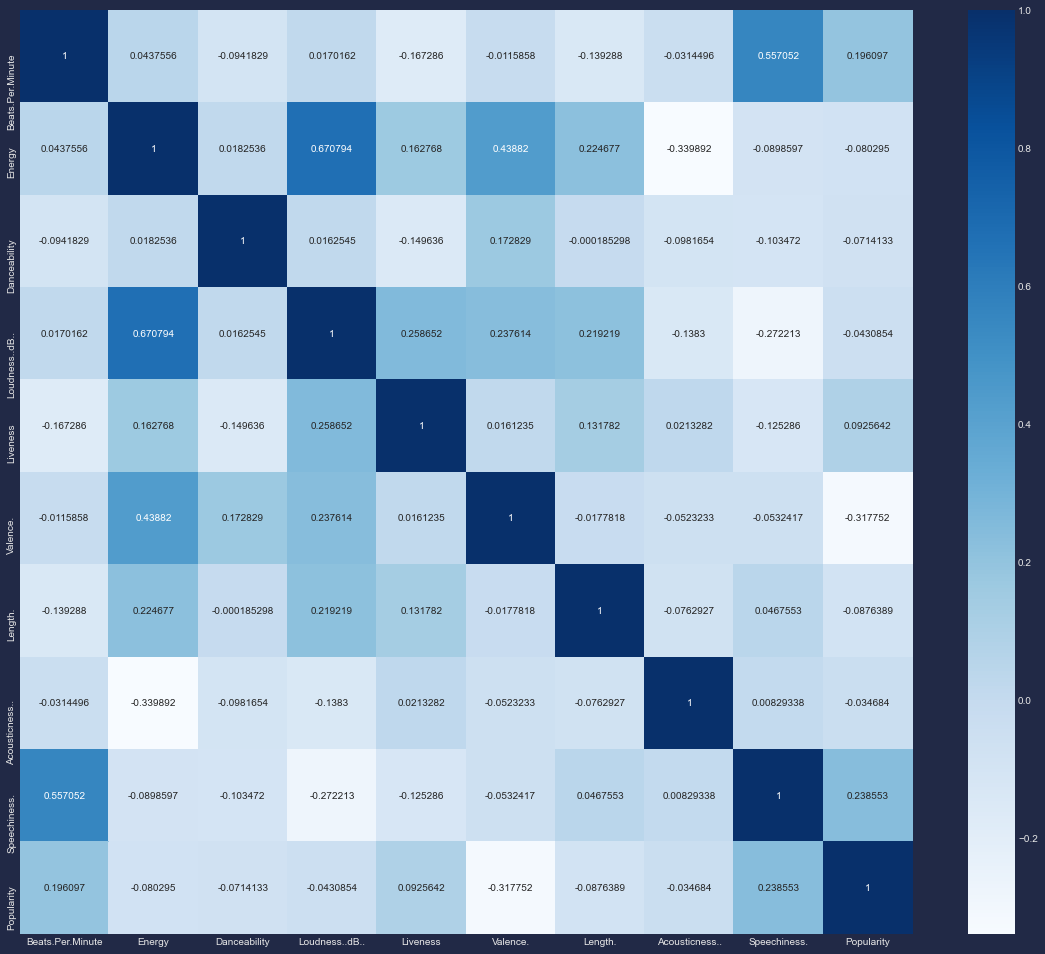

In [43]:
plt.figure(figsize=(20,17))
sns.heatmap(spotify.corr(),annot=True,cmap='Blues', fmt='g');

***

# Conclusion


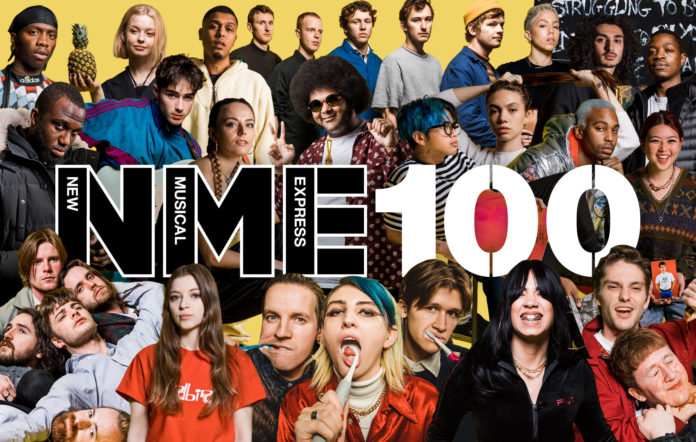


<div class="alert alert-block alert-info">
    <br>
    <b> To Sum up our findings we can say that by above data we conclude that all the features mentioned in dataset like Loudness, Danceability, Energy, Liveness, Length etc matters a lot. It can shape whole structure of song, these factors are so important that even though you are some new singer or artist you can reach good heights by using above features properly.
        <br>
        I guess that's how these singers had made some changes in their songs. Data can change everything 😊😊
</div>

# Future Work

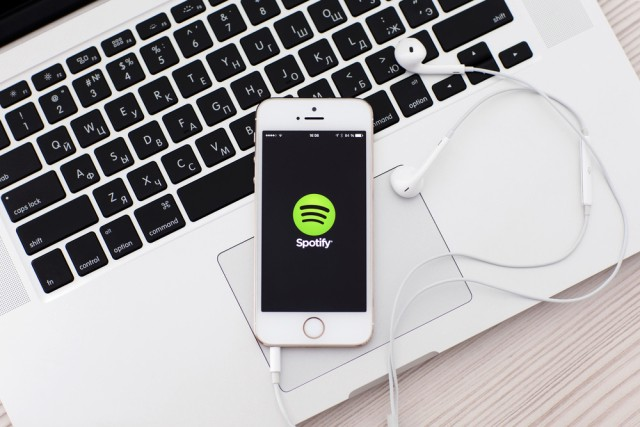


<div class="alert alert-block alert-info">
    <br>
    <b> Here I had done Data Analysis of all the songs which were top in that particular year
        <br>
        I had also found out what might be reasons for it through various plots and graphs
        <br>
        <h3>What Next?</h3>
        <br>
        <b> We can build a model where we can calculate by tracking all the features which mentioned in our dataset and then predict whether this particular song can make it in top 50 of upcoming charts.😎😎🎶
</div>